In [ ]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.datasets import load_iris
%matplotlib inline
%precision 3
np.set_printoptions(precision=3)

In [ ]:
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(iris.data,columns=[iris.feature_names])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = iris.data

In [ ]:
X.shape

(150, 4)

#Standardize

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
print(X_std[0:5])
print("The shape of Feature Matrix is -",X_std.shape)

[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
The shape of Feature Matrix is - (150, 4)


In [ ]:
X_covariance_matrix = np.cov(X_std.T)

In [ ]:
X_covariance_matrix

array([[ 1.007, -0.118,  0.878,  0.823],
       [-0.118,  1.007, -0.431, -0.369],
       [ 0.878, -0.431,  1.007,  0.969],
       [ 0.823, -0.369,  0.969,  1.007]])

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.521 -0.377 -0.72   0.261]
 [-0.269 -0.923  0.244 -0.124]
 [ 0.58  -0.024  0.142 -0.801]
 [ 0.565 -0.067  0.634  0.524]]

Eigenvalues 
[2.938 0.92  0.148 0.021]


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))] 

# Sort the (eigenvalue, eigenvectors) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print("Eigenvalues in descending order: ")
for i in eig_pairs:
  print(i[0])

Eigenvalues in descending order: 
2.9380850501999918
0.9201649041624865
0.14774182104494768
0.02085386217646253


In [ ]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance captured by each component is \n',var_exp)
print(40 * '-')
print("Cumulative variance captured as we travel each component \n",cum_var_exp)
# First two contribute maximum

Variance captured by each component is 
 [72.96244541329987, 22.85076178670177, 3.668921889282871, 0.5178709107154866]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 72.962  95.813  99.482 100.   ]


In [ ]:
print('All Eigen Values along with Eigen Vectors')
pprint.pprint(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(2.9380850501999918, array([ 0.521, -0.269,  0.58 ,  0.565])),
 (0.9201649041624865, array([-0.377, -0.923, -0.024, -0.067])),
 (0.14774182104494768, array([-0.72 ,  0.244,  0.142,  0.634])),
 (0.02085386217646253, array([ 0.261, -0.124, -0.801,  0.524]))]
----------------------------------------
Matrix W:
 [[ 0.521 -0.377]
 [-0.269 -0.923]
 [ 0.58  -0.024]
 [ 0.565 -0.067]]


In [ ]:
Y = X_std.dot(matrix_w)
print(Y[0:5])

[[-2.265 -0.48 ]
 [-2.081  0.674]
 [-2.364  0.342]
 [-2.299  0.597]
 [-2.39  -0.647]]


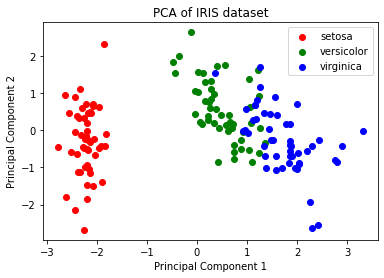

In [ ]:
pl.figure()
target_names = iris.target_names
y = iris.target
for c, i, target_name in zip("rgb", [0,1,2], target_names):
  pl.scatter(Y[y==i,0], Y[y==i,1], c=c, label = target_name)
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.legend()
pl.title('PCA of IRIS dataset')
pl.show()